## Import Data

In [45]:
# Setup Packages
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

%matplotlib inline

# Used for auto-formatting code
# terminal - pip install nb_black
%load_ext nb_black

# Display all rows and columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [46]:
house_data = pd.read_csv("train.csv")

<IPython.core.display.Javascript object>

In [47]:
house_data.isna().sum()


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

<IPython.core.display.Javascript object>

In [48]:
var_toremove = [
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Heating",
    "HeatingQC",
    "CentralAir",
    "Electrical",
    "KitchenQual",
    "Functional",
    "FireplaceQu",
    "GarageType",
    "GarageFinish",
    "GarageQual",
    "GarageCond",
    "PavedDrive",
    "PoolQC",
    "Fence",
    "MiscFeature",
    "SaleType",
    "SaleCondition",
]

house_data.drop(var_toremove, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [49]:
rich_var_toremove = [
    "Exterior1st",
    "Exterior2nd",
    "HouseStyle",
    "LandContour",
    "LotConfig",
    "MSSubClass",
    "MSZoning",
    "RoofMatl",
    "Street",
    "Utilities",
    "ExterCond",
    "ExterQual",
    "Alley",
    "Condition1",
    "Condition2",
    "BldgType",
    "RoofStyle",
    "LotShape",
    "LandSlope",
    "Neighborhood",
    "MasVnrType",
    "Foundation",
]


house_data.drop(rich_var_toremove, axis=1, inplace=True)

<IPython.core.display.Javascript object>

## Data Manipulation

### Response Variable - Log Transform
- Transformation validated in DataExploration Notebook

In [50]:
house_data["SalePrice_log"] = np.log(house_data["SalePrice"])

<IPython.core.display.Javascript object>

### Impute Continuous Variables
- Imputation with mean validated in DataExploration Notebook

In [51]:
# Impute LotFrontage Mean
avg_LotFrontage = house_data["LotFrontage"].mean()
house_data["LotFrontage"].fillna(avg_LotFrontage, inplace=True)

# Impute MasVnrArea: Mean
avg_MasVnrArea = house_data["MasVnrArea"].mean()
house_data["MasVnrArea"].fillna(avg_MasVnrArea, inplace=True)

# Impute Garage: Assume GarageYrBlt the same as YearBuilt
idx = house_data.index[house_data["GarageYrBlt"].isna()]
house_data["GarageYrBlt"].fillna(house_data["YearBuilt"][idx], inplace=True)

<IPython.core.display.Javascript object>

## Remove Outliers

In [52]:
# Separate predictors by numerical and categorical features
from functions_file import categorize

cat_features, num_cont_features, num_disc_features = categorize(house_data)

<IPython.core.display.Javascript object>

In [53]:
# Determine Outliers of Continuous Data
def outlier_idx(data, thresh):

    avg = data.mean()  # calc average
    stdev = data.std()  # calc standard deviation
    z_score = (data - avg) / stdev  # calc z_score
    ol = z_score > thresh  # boolean (True=outlier)
    outlier_idx = data.index[ol]  # indexes of outliers

    return list(outlier_idx)

<IPython.core.display.Javascript object>

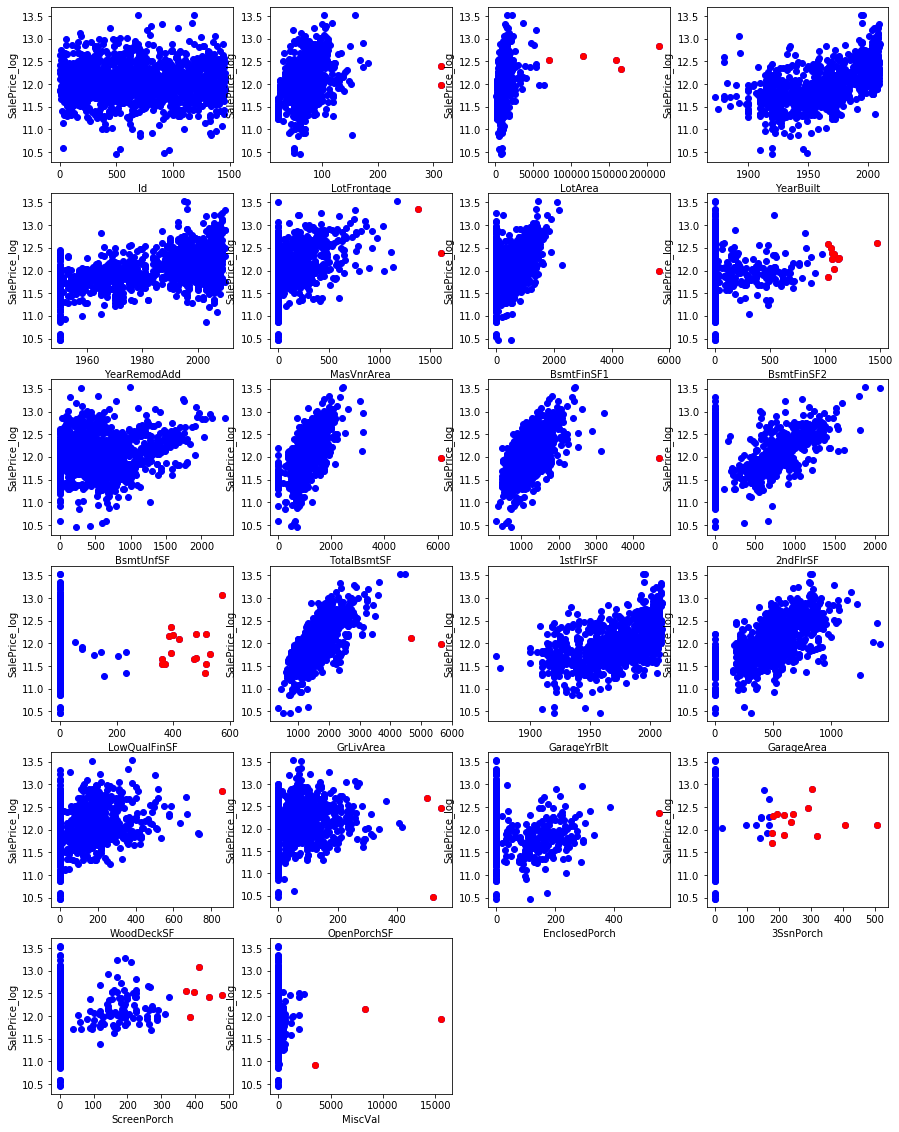

<IPython.core.display.Javascript object>

In [54]:
# Plot Outliers
plt.figure(figsize=(15, 20))
for idx, col in enumerate(num_cont_features):
    outliers = outlier_idx(house_data[col], 6)  # outlier indices
    plt.subplot(math.ceil(len(num_cont_features) / 4), 4, idx + 1)
    plt.scatter(x=house_data[col], y=house_data["SalePrice_log"], c="blue")
    plt.scatter(
        x=house_data[col][outliers], y=house_data["SalePrice_log"][outliers], c="red"
    )
    plt.ylabel("SalePrice_log")
    plt.xlabel(col)

In [55]:
# Identify outliers within listed variables
vars_outliers = (
    "LotFrontage",
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "GrLivArea",
)

outlier_store = {}
thresh = 6  # outlier > +6std away from mean
for idx, col in enumerate(vars_outliers):
    outliers = outlier_idx(house_data[col], thresh)  # outlier indices
    if len(outliers) > 0:
        outlier_store[col] = outliers  # only store features with outliers

<IPython.core.display.Javascript object>

In [56]:
# Remove outlier observations
res = []
for key in outlier_store.keys():
    res.append(outlier_store[key])
outlier_idx = [item for sublist in res for item in sublist]

house_data.drop(outlier_idx, inplace=True)

<IPython.core.display.Javascript object>

In [57]:
house_data.head(10)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
0,1,65.000000,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,12.247694
1,2,80.000000,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,12.109011
2,3,68.000000,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,12.317167
3,4,60.000000,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,11.849398
4,5,84.000000,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,12.429216
5,6,85.000000,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,11.870600
6,7,75.000000,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,12.634603
7,8,70.049958,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,12.206073
8,9,51.000000,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,11.774520
9,10,50.000000,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,11.678440


<IPython.core.display.Javascript object>

In [58]:
house_data.to_csv("jon_original_HouseData.csv")

<IPython.core.display.Javascript object>